In [6]:
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt

In [75]:
def load(path_img, path_lbl):
  from array import array
  import struct

  with gzip.open(path_lbl, 'rb') as file:
    magic, size = struct.unpack(">II", file.read(8))
    if magic != 2049:
      raise ValueError('Magic number mismatch, expected 2049, got {0}'.format(magic))
    labels = array("B", file.read())

  with gzip.open(path_img, 'rb') as file:
    magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
    if magic != 2051:
      raise ValueError('Magic number mismatch, expected 2051, got {0}'.format(magic))
    image_data = array("B", file.read())

  images = []
  for i in range(size): images.append([0] * rows * cols)
  for i in range(size): images[i] = np.array(image_data[i * rows * cols:(i + 1) * rows * cols]).reshape(28,28)[::2,::2].reshape(-1)
  return pd.DataFrame(images), pd.Series(labels)


In [77]:
def peekData(X_train):
  # The 'targets' or labels are stored in y. The 'samples' or data is stored in X
  print ("Peeking your data...")
  fig = plt.figure()

  cnt = 0
  for col in range(5):
    for row in range(10):
      plt.subplot(5, 10, cnt + 1)
      plt.imshow(X_train.ix[cnt,:].values.reshape(14,14), cmap=plt.cm.gray_r, interpolation='nearest')
      plt.axis('off')
      cnt += 1
  # fig.set_tight_layout(True)
  plt.show()

In [76]:
# To check for a random number
def pred_check(a):
    true_1000th_test_value = y_test[a]
    
    print (a, "th test label: ", true_1000th_test_value)
    
    guess_1000th_test_value = model.predict(X_test.iloc[[a]])
    print (a,"th test prediction: ", guess_1000th_test_value)
    plt.imshow(X_test.ix[a,:].values.reshape(14,14), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [78]:
dir = 'C:/Users/anshangu/Documents/GitHub/Python_LogisticReg/DataScience-with-Python/MNIST Digit Recognition/'
X_train, y_train = load(dir + 'train-images-idx3-ubyte.gz', dir + 'train-labels-idx1-ubyte.gz')
X_test, y_test = load(dir + 't10k-images-idx3-ubyte.gz', dir + 't10k-labels-idx1-ubyte.gz')

Peeking your data...


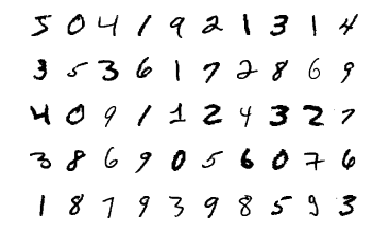

In [73]:
peekData(X_train)

In [127]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
print('Training KNN Classifier...')
modelKNN = KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(X_train, y_train)
print('Time taken to fit in  mins ', (time.time() - start_time)/60)
start_time = time.time()
print('Scoring KNN model....')
score = modelKNN.score(X_test, y_test)
print('KNN Score \n', score)
print('Time taken to score in  mins ', (time.time() - start_time)/60)

Training KNN Classifier...
Time taken to fit in  mins  0.34963690042495726
Scoring KNN model....
KNN Score 
 0.9613
Time taken to score in  mins  3.6237903952598574


4128 th test label:  3
4128 th test prediction:  [3]


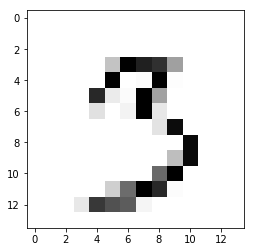

In [122]:
from random import randint
pred_check(randint(1,10000))

In [105]:
import time
from sklearn.svm import SVC
model = SVC(kernel = 'poly', cache_size = 70000)
start_time = time.time()
print('Training SVC Classifier...')
model.fit(X_train, y_train)
print('Time taken to fit in  mins ', (time.time() - start_time)/60)
start_time = time.time()
print('Scoring model....')
score = model.score(X_test,y_test)
print('SVC Score \n', score)
print('Time taken to score in  mins ', (time.time() - start_time)/60)

Training SVC Classifier...
Time taken to fit in  mins  9.363362447420757
Scoring model....
SVC Score 
 0.9735
Time taken to score in  mins  0.353953484694163


In [125]:
from sklearn.externals import joblib
fileName = 'finalized_model.sav'
joblib.dump(model, fileName)

['finalized_model.sav']